In [1]:
# Data
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Train Test Split
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# GridSearchCV
from sklearn.model_selection import GridSearchCV

# KFold
from sklearn.model_selection import RepeatedStratifiedKFold

# Validation
from sklearn.model_selection import cross_val_predict

# Scaling
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, auc, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from statistics import stdev

# Ensembling
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


from matplotlib.gridspec import GridSpec
import missingno as msno
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("dataset/data_cardiovascular_risk.csv")
data

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [3]:
df=pd.DataFrame(data)
df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [4]:
# Fill missing values
df['education'].fillna(df['education'].value_counts().idxmax(), inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)
df['BPMeds'].fillna(df['BPMeds'].value_counts().idxmax(), inplace=True)
df['totChol'].fillna(df['totChol'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['heartRate'].fillna(df['heartRate'].median(), inplace=True)
df['glucose'].fillna(df['glucose'].median(), inplace=True)

In [6]:
# now convert categorical to numerical:
df1 = df.copy()
df1['sex'] = df1.sex.replace(['M', 'F'], [3, 2])
df1['is_smoking'] = df1.is_smoking.replace(['YES', 'NO'], [3, 2])
df1

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,2,3,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,3,2,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,2,3,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,3,3,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,2,3,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,2,2,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,2,2,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,3,3,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,3,2,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [7]:
df1.drop(['id'],axis=1,inplace=True)

In [8]:
Nnumerical= ['prevalentHyp','totChol','sysBP','diaBP','BMI','heartRate','glucose','cigsPerDay']
Target='TenYearCHD'

In [9]:
x=df1.drop('TenYearCHD',axis=1)
y=df1['TenYearCHD']


In [10]:
def RF(x, y, test_sizes):
    # Crear un DataFrame vacío con las columnas adecuadas
    df_evaluation = pd.DataFrame(columns=['Test_size', 'acc', 'score'])
    
    for test_size in test_sizes:
        # Dividir los datos en conjuntos de entrenamiento y prueba
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=5)
        
        # Inicializar y entrenar el modelo KNeighborsClassifier
        model = KNeighborsClassifier()
        model.fit(x_train, y_train)
        
        # Realizar predicciones
        y_pred = model.predict(x_test)
        
        # Crear un nuevo DataFrame con los resultados
        new_row = pd.DataFrame({
            'Test_size': [test_size],
            'acc': [metrics.accuracy_score(y_test, y_pred)],
            'score': [model.score(x, y)]
        })
        
        # Concatenar el nuevo DataFrame con el existente
        df_evaluation = pd.concat([df_evaluation, new_row], ignore_index=True)
    
    return x_train, x_test, y_train, y_test, y_pred, df_evaluation

In [11]:
def highlight_max (s):
    is_max = s == s.max()
    return ['background-color:blue' if v else '' for v in is_max]

In [12]:
x_train, x_test, y_train, y_test,y_pred,df_evaluation=RF(x,y,[.1,.15,.2,.25,.3,.35])

df_evaluation.style.apply (highlight_max)

,Test_size,acc,score
0,0.100000,0.831858,0.866372
1,0.150000,0.827112,0.863127
2,0.200000,0.825959,0.860177
3,0.250000,0.820755,0.857817
4,0.300000,0.824975,0.854277
5,0.350000,0.823083,0.854277


In [14]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.1, random_state=0)

In [15]:
RF=RandomForestClassifier(n_estimators=200)
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)

In [16]:
print(classification_report(y,RF.predict(x)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2879
           1       0.99      0.89      0.94       511

    accuracy                           0.98      3390
   macro avg       0.99      0.95      0.97      3390
weighted avg       0.98      0.98      0.98      3390



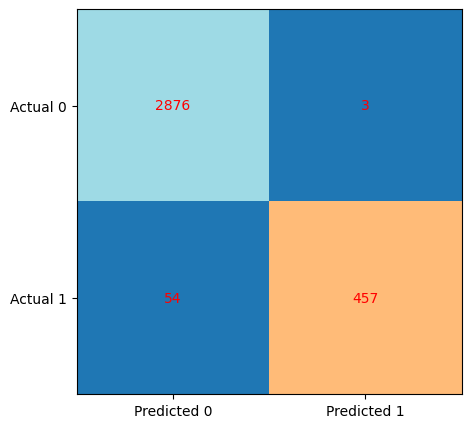

In [17]:
cm = confusion_matrix(y,RF.predict(x))
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(cm,cmap='tab20')
ax.grid(False)
ax.xaxis.set(ticks = (0,1), ticklabels = ("Predicted 0","Predicted 1"))
ax.yaxis.set(ticks = (0,1), ticklabels = ("Actual 0", "Actual 1"))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha = "center",va = "center",color='r')
plt.show()

In [18]:
feature_names = x.columns
target_names = ["0", "1", "2", "3"]

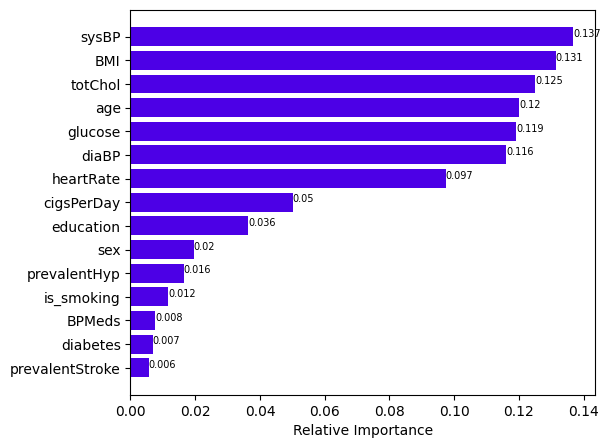

In [19]:
# Get feature importances from the Random Forest model
importances = RF.feature_importances_

# Sort the features by importance
indices = np.argsort(importances)

# Create a horizontal bar plot of the feature importances
plt.figure(figsize=(6, 5))
plt.barh(range(len(indices)), importances[indices], color='#4c00e6', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

# Add labels to the bars
for i, v in enumerate(importances[indices]):
    plt.text(v, i, str(round(v, 3)), color='black', fontsize= 7)

plt.show()

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import joblib

# Train the model
RF = RandomForestClassifier(n_estimators=200)
RF.fit(x_train, y_train)

# Save the model to a file
model_filename = 'random_forest_model.joblib'
joblib.dump(RF, model_filename)
print(f"Model saved to {model_filename}")


Model saved to random_forest_model.joblib
